In [1]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

csv_file_path = '/content/Botanist_Training_Set.csv'
df = pd.read_csv(csv_file_path)

IMAGE_SIZE = (128, 128)
IMAGE_PATH = '/content/TrainFiles\\TrainFiles\\'  

def load_and_preprocess_image(filename):
    img_path = os.path.join(IMAGE_PATH, f"{filename}.jpg")
    img = load_img(img_path, target_size=IMAGE_SIZE)
    img_array = img_to_array(img)
    img_array = img_array / 255.0  
    return img_array

images = []
labels = []
for _, row in df.iterrows():
    filename = str(row['FileName'])
    label = row['Label'] - 1  
    img_array = load_and_preprocess_image(filename)
    images.append(img_array)
    labels.append(label)

images = np.array(images)
labels = np.array(labels)

labels = to_categorical(labels, num_classes=38)

X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [2]:
print(df.head())

print(f'Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}')
print(f'Validation data shape: {X_val.shape}, Validation labels shape: {y_val.shape}')
print(f'Test data shape: {X_test.shape}, Test labels shape: {y_test.shape}')

   FileName  Label
0  45945143      6
1  91233284     25
2   3082537     17
3  13822720      7
4  17579915     25
Training data shape: (35000, 128, 128, 3), Training labels shape: (35000, 38)
Validation data shape: (7500, 128, 128, 3), Validation labels shape: (7500, 38)
Test data shape: (7500, 128, 128, 3), Test labels shape: (7500, 38)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(38, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


In [4]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 221s 198ms/step - accuracy: 0.4664 - loss: 1.9988 - val_accuracy: 0.7975 - val_loss: 0.6415
Epoch 2/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 210s 192ms/step - accuracy: 0.7952 - loss: 0.6583 - val_accuracy: 0.8853 - val_loss: 0.3705
Epoch 3/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 209s 191ms/step - accuracy: 0.8571 - loss: 0.4483 - val_accuracy: 0.8977 - val_loss: 0.3134
Epoch 4/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 208s 190ms/step - accuracy: 0.8965 - loss: 0.3233 - val_accuracy: 0.9081 - val_loss: 0.2863
Epoch 5/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 211s 193ms/step - accuracy: 0.9211 - loss: 0.2367 - val_accuracy: 0.9063 - val_loss: 0.2929
Epoch 6/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 214s 196ms/step - accuracy: 0.9318 - loss: 0.2067 - val_accuracy: 0.9240 - val_loss: 0.2516
Epoch 7/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 210s 192ms/step - accuracy: 0.9499 - loss: 0.1541 - val_accuracy: 0.9325 - val_loss: 0.2222
Epoch 8/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 203s 186ms/step - ac

In [5]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.9376 - loss: 0.3520
Test Accuracy: 93.39%


In [6]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)


235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step


235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 0.9435 - loss: 0.3377
Test Loss: 0.3184475302696228
Test Accuracy: 93.89%
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step


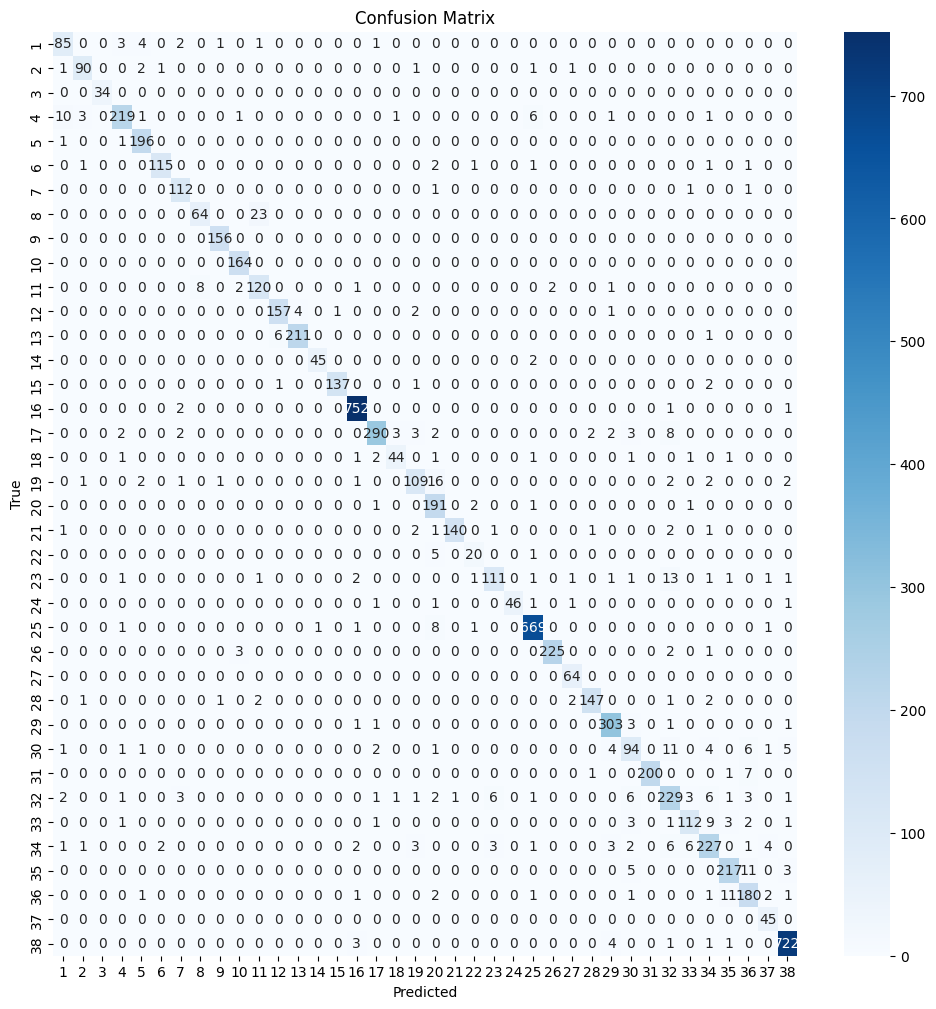

              precision    recall  f1-score   support

           1       0.83      0.88      0.85        97
           2       0.93      0.93      0.93        97
           3       1.00      1.00      1.00        34
           4       0.95      0.90      0.92       243
           5       0.95      0.99      0.97       198
           6       0.97      0.94      0.96       122
           7       0.92      0.97      0.95       115
           8       0.89      0.74      0.81        87
           9       0.98      1.00      0.99       156
          10       0.96      1.00      0.98       164
          11       0.82      0.90      0.85       134
          12       0.96      0.95      0.95       165
          13       0.98      0.97      0.97       218
          14       0.98      0.96      0.97        47
          15       0.99      0.97      0.98       141
          16       0.98      0.99      0.99       756
          17       0.97      0.91      0.94       317
          18       0.90    

In [15]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 39), yticklabels=range(1, 39))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

report = classification_report(y_true, y_pred, target_names=[str(i) for i in range(1, 39)])
print(report)


In [22]:
test_csv_file_path = '/content/Botanist_Test_Set.csv'
test_df = pd.read_csv(test_csv_file_path)

IMAGE_SIZE = (128, 128)
IMAGE_PATH = '/content/TestFiles\\TestFiles\\'  

def load_and_preprocess_image(filename):
    base_filename = filename.split('.')[0]
    img_path = os.path.join(IMAGE_PATH, f"{base_filename}.jpg")
    if not os.path.exists(img_path):
        print(f"File not found: {img_path}")  
        return None
    print(f"Loading image from: {img_path}")  
    img = load_img(img_path, target_size=IMAGE_SIZE)
    img_array = img_to_array(img)
    img_array = img_array / 255.0 
    return img_array

test_images = []
valid_filenames = []
for _, row in test_df.iterrows():
    filename = str(row['FileName'])
    img_array = load_and_preprocess_image(filename)
    if img_array is not None:
        test_images.append(img_array)
        valid_filenames.append(filename.split('.')[0])

test_images = np.array(test_images)

predicted_classes = np.argmax(model.predict(test_images), axis=1)

results_df = pd.DataFrame({
    'FileName': valid_filenames,
    'PredictedClass': predicted_classes + 1  
})

output_csv_path = '/content/predicted_labels.csv'
results_df.to_csv(output_csv_path, index=False)
print(f"Predictions saved to {output_csv_path}")

Loading image from: c:\Users\byasw\Downloads\Botanist Test Files\Botanist Test Files\TestFiles\TestFiles\64559325.jpg
Loading image from: c:\Users\byasw\Downloads\Botanist Test Files\Botanist Test Files\TestFiles\TestFiles\52439467.jpg
Loading image from: c:\Users\byasw\Downloads\Botanist Test Files\Botanist Test Files\TestFiles\TestFiles\1336013.jpg
Loading image from: c:\Users\byasw\Downloads\Botanist Test Files\Botanist Test Files\TestFiles\TestFiles\77778059.jpg
Loading image from: c:\Users\byasw\Downloads\Botanist Test Files\Botanist Test Files\TestFiles\TestFiles\28148617.jpg
Loading image from: c:\Users\byasw\Downloads\Botanist Test Files\Botanist Test Files\TestFiles\TestFiles\52025491.jpg
Loading image from: c:\Users\byasw\Downloads\Botanist Test Files\Botanist Test Files\TestFiles\TestFiles\39350917.jpg
Loading image from: c:\Users\byasw\Downloads\Botanist Test Files\Botanist Test Files\TestFiles\TestFiles\42031842.jpg
Loading image from: c:\Users\byasw\Downloads\Botanist Tes